# New York City Airbnb Open Data
## Airbnb listings and metrics in NYC, NY, USA (2019) 
### Source: Kaggle https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/version/1#

Info from kaggle

Context

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

Content

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

Acknowledgements

This public dataset is part of Airbnb, and the original source can be found on this website.

Inspiration

What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?


idlisting ID

namename of the listing

host_idhost ID

host_namename of the host

neighbourhood_grouplocation

neighbourhoodarea

latitudelatitude coordinates

longitudelongitude coordinates

room_typelisting space type

priceprice in dollars

minimum_nightsamount of nights minimum

number_of_reviewsnumber of reviews

last_reviewlatest review

reviews_per_monthnumber of reviews per month

calculated_host_listings_count:amount of listing per host

availability_365number of days when listing is available for booking

In [80]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import scipy
from scipy import stats

In [2]:
# Importing the data
df=pd.read_csv('https://gist.githubusercontent.com/danischloeter/cd86222a1dc89f3814d9f8b0bf7f925a/raw/8593ae1726fba7035f4519d94bb5273162684812/AB_NYC_2019')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [30]:
#show graphs without the need to involke plt.show()
%matplotlib inline 

#Now set some default parameters
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.rcParams['legend.fontsize']=12



Text(0, 0.5, 'Mean price')

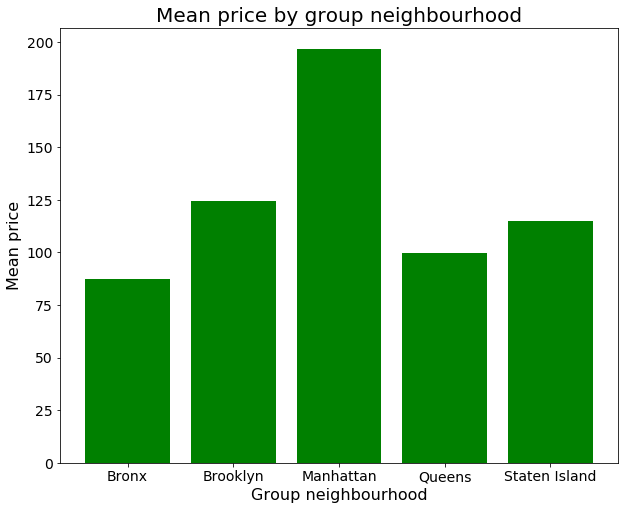

In [33]:
grouped=df.groupby(['neighbourhood_group']).mean()

# Top ten departing airports
plt.bar(grouped.index,grouped['price'],color='green')
plt.title('Mean price by group neighbourhood')
plt.xlabel('Group neighbourhood')
plt.ylabel('Mean price')

Text(0, 0.5, 'Mean price')

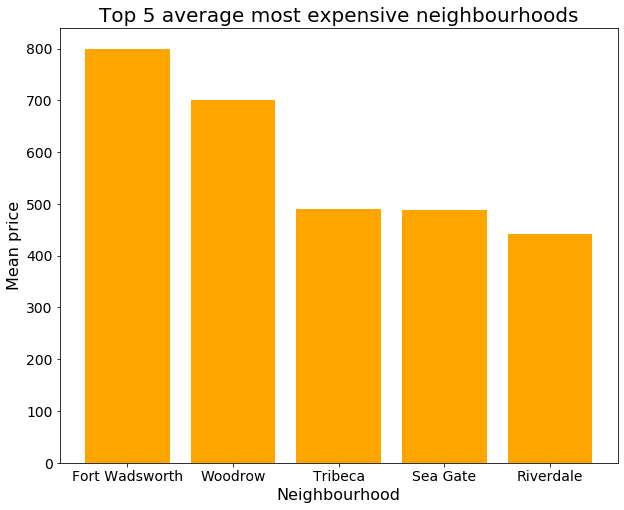

In [38]:
grouped=df.groupby(['neighbourhood']).mean()
s=grouped.sort_values(by='price', ascending=False).head(5)

# Top ten departing airports
plt.bar(s.index,s['price'],color='orange')
plt.title('Top 5 average most expensive neighbourhoods')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean price')

Text(0.5, 0, 'Room type')

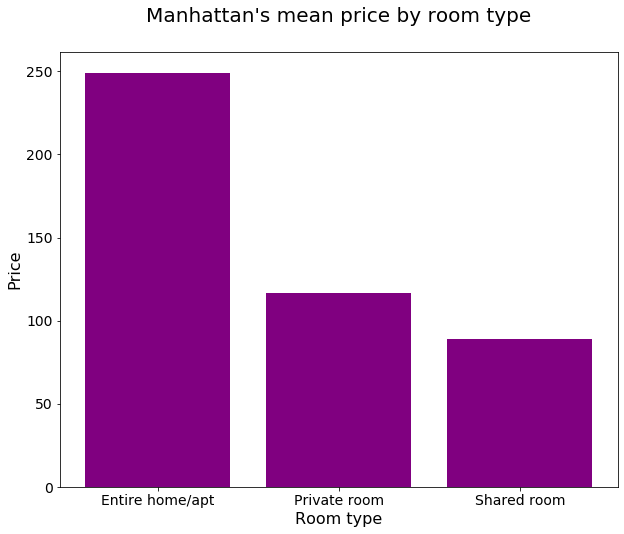

In [112]:
# Let's explore Manhattan

dfManhattan=df.loc[df['neighbourhood_group']=='Manhattan']
Manhattan=dfManhattan.groupby('room_type').mean()
Manhattan.head()

plt.bar(Manhattan.index, Manhattan['price'], color="purple")
plt.title("Manhattan's mean price by room type", pad=30)
plt.ylabel("Price")
plt.xlabel("Room type")



Text(0.5, 0, 'Room type')

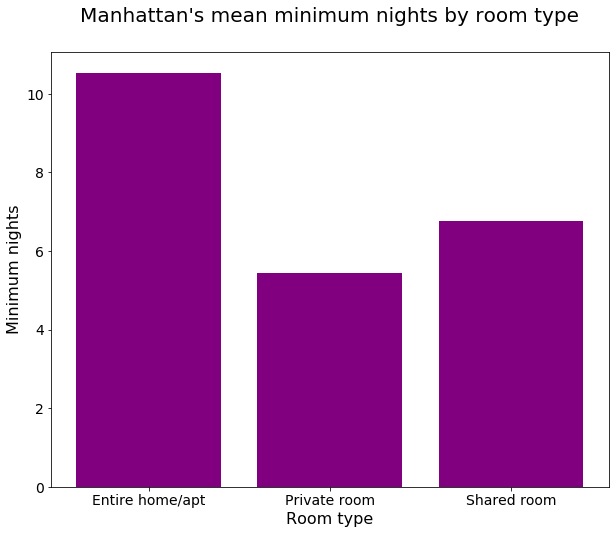

In [62]:
plt.bar(Manhattan.index, Manhattan['minimum_nights'], color="purple")
plt.title("Manhattan's mean minimum nights by room type", pad=30)
plt.ylabel("Minimum nights")
plt.xlabel("Room type")

Text(0.5, 0, 'Mean number of reviews by host')

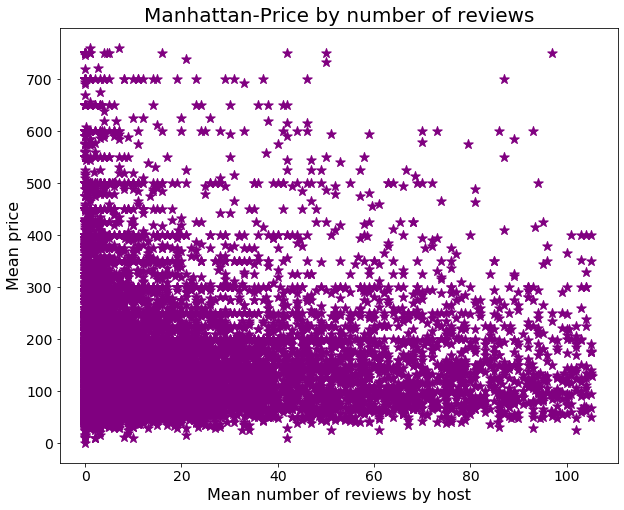

In [116]:
Manhattang=dfManhattan.groupby(['room_type','host_id']).mean()
Manhattang['zscorenumber_of_reviews']=scipy.stats.zscore(Manhattang['number_of_reviews'])
Manhattang['zscoreprice']=scipy.stats.zscore(Manhattang['price'])
Manhattang=Manhattang.loc[Manhattang['zscorenumber_of_reviews']<2]
Manhattang=Manhattang.loc[Manhattang['zscoreprice']<2]

plt.scatter(Manhattang['number_of_reviews'],Manhattang['price'],marker="*",s=100,linestyle="solid", color='purple')
plt.title("Manhattan-Price by number of reviews")
plt.ylabel("Mean price")
plt.xlabel("Mean number of reviews by host")
# plt.legend(loc='lower right')

In [111]:
Manhattang.head(50)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,zscorenumber_of_reviews,zscoreprice
room_type,,,,,,,,,,,,
Shared room,2.115615e+07,9.666720e+07,40.770035,-73.9717,88.977083,6.766667,21.4,1.792781,3.885417,138.572917,-0.11818,-0.896517


Text(0.5, 0, 'Room type')

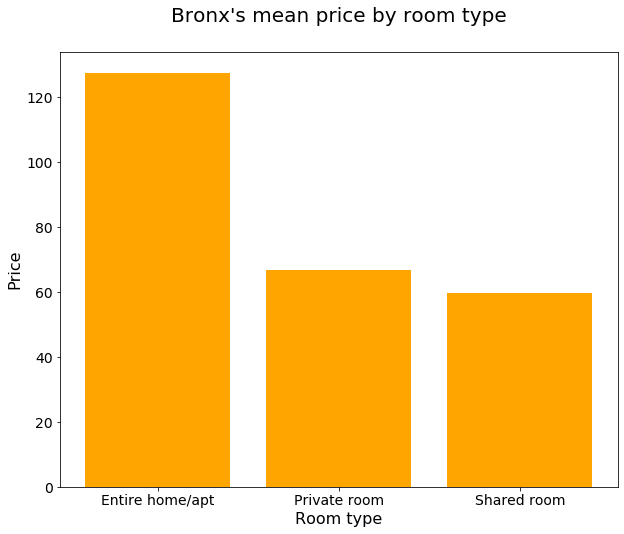

In [100]:
# Let's explore Bronx

dfBronx=df.loc[df['neighbourhood_group']=='Bronx']
Bronx=Bronx.groupby('room_type').mean()
Bronx.head()

plt.bar(Bronx.index, Bronx['price'], color="orange")
plt.title("Bronx's mean price by room type", pad=30)
plt.ylabel("Price")
plt.xlabel("Room type")



Text(0.5, 0, 'Room type')

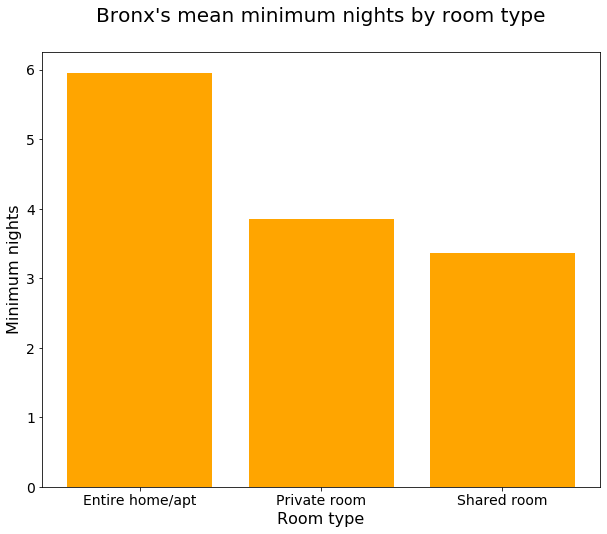

In [99]:
plt.bar(Bronx.index, Bronx['minimum_nights'], color="orange")
plt.title("Bronx's mean minimum nights by room type", pad=30)
plt.ylabel("Minimum nights")
plt.xlabel("Room type")

Text(0.5, 0, 'Mean number of reviews by host ID')

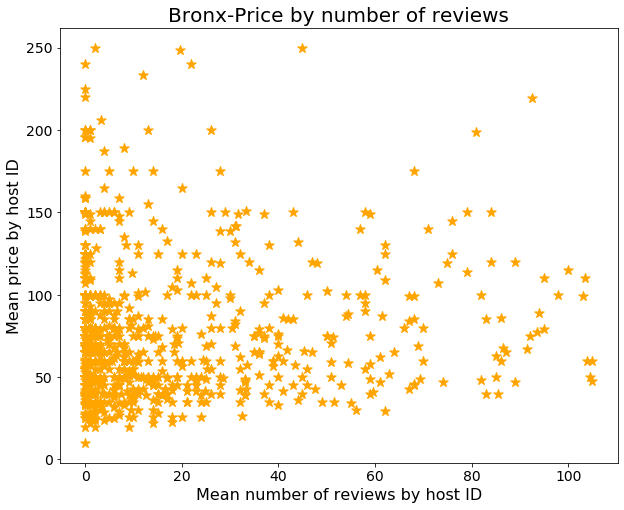

In [119]:

Bronxg=dfBronx.groupby(['room_type','host_id']).mean()
Bronxg.head(50)
Bronxg['zscorenumber_of_reviews']=scipy.stats.zscore(Bronxg['number_of_reviews'])
Bronxg['zscoreprice']=scipy.stats.zscore(Bronxg['price'])
Bronxg=Bronxg.loc[Bronxg['zscorenumber_of_reviews']<2]
Bronxg=Bronxg.loc[Bronxg['zscoreprice']<2]

plt.scatter(Bronxg['number_of_reviews'],Bronxg['price'],marker="*",s=100,linestyle="solid", color='orange')
plt.title("Bronx-Price by number of reviews")
plt.ylabel("Mean price by host ID")
plt.xlabel("Mean number of reviews by host ID")
# plt.legend(loc='lower right')